In [11]:
import pandas as pd

EASY

#1 How many unique customers are in the dataset?

In [19]:
df = pd.read_csv('fct_invoice.csv')
jf = pd.read_json('dim_customer.json')

id = jf['id']

numbers = id.value_counts()

unique = numbers == 1

(unique==True).count()

5191

#2 What are the different categories of products available? How many unique categories are there?

In [16]:
num_category = df['category'].value_counts()

num_category.count()

8

In [18]:
df['category'].nunique()

8

#3 Which payment method is the most popular? How many times was it used?

In [7]:
categories = df['payment_method']
num_category = df['payment_method'].value_counts()

num_category.idxmax()

'Cash'

In [6]:
num_category = df['payment_method'].value_counts()

num_category.max()

44447

Medium

#1 What are the three most popular categories, by total sales?

In [5]:
x = df.groupby('category').sum(numeric_only=True)['price'] * df.groupby('category').sum(numeric_only=True)['quantity']

x.nlargest(3)

category
Clothing      3.218136e+12
Shoes         5.479955e+11
Technology    2.369120e+11
dtype: float64

#2 What are the total sales attributed to customers over the age of 45?

In [20]:
import pandas as pd

df = pd.read_csv('fct_invoice.csv')
jf = pd.read_json('dim_customer.json')

x = jf['age'] > 45.0

oldies = jf[(x == True)]

joined = pd.merge(oldies, df, left_on='id', right_on='customer_id')

round((joined['quantity']*joined['price']).sum(),2)

82039768.15

#3 How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

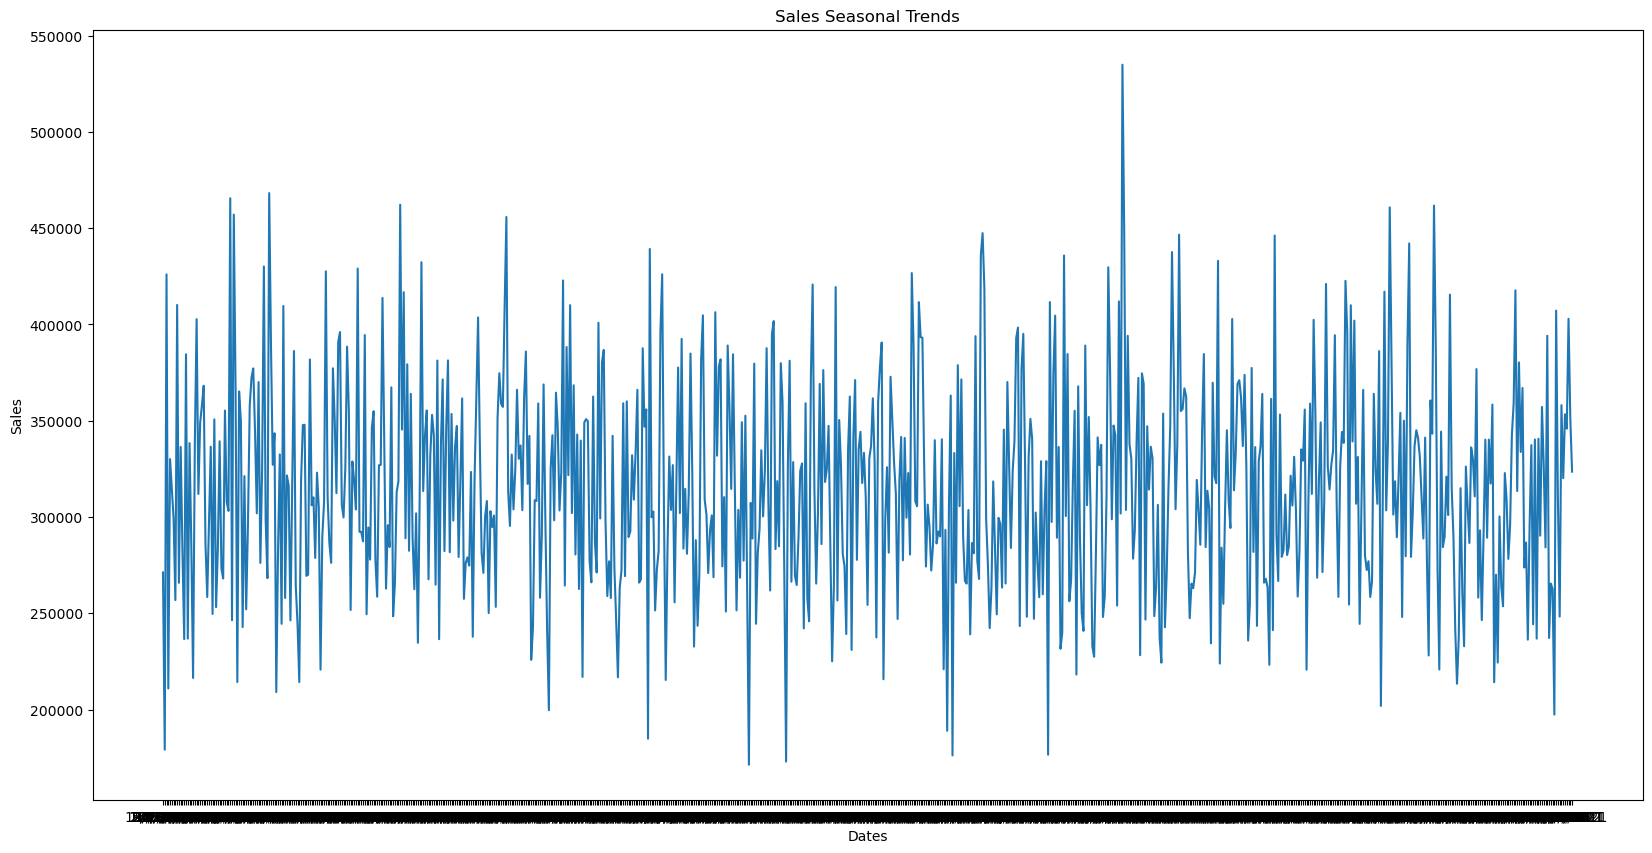

In [157]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('fct_invoice.csv')

df['invoice_date']

sales = df['quantity']*df['price']

plt.figure(figsize=(20,10))
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.title('Sales Seasonal Trends')

x = (df['invoice_date']).unique()
y = sales.groupby(df['invoice_date']).sum(numeric_only=True)

plt.plot(x,y)
plt.show()

Hard

#1 Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g. 10-19, 20-29, and so forth)

In [297]:
import numpy as np

orig = pd.merge(df, jf, left_on='customer_id', right_on='id')
decade_age_ranges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
orig['decade_age_range'] = pd.cut(orig['age'], bins=decade_age_ranges, labels=decade_age_ranges[:-1])
orig['sales'] = orig['quantity']*orig['price']

pivot_table = pd.pivot_table(orig, values='sales', index='category', columns='decade_age_range', aggfunc=np.sum)

print(pivot_table)

decade_age_range    0          10           20           30           40  \
category                                                                   
Books             0.0    19891.95     80128.35     84446.10     82946.25   
Clothing          0.0  3029007.52  10079987.28  11516170.16  10933114.72   
Cosmetics         0.0   178009.48    594733.82    722406.22    656740.32   
Food & Beverage   0.0    20433.61     74271.23     89187.19     85034.57   
Shoes             0.0  1367187.26   6152942.84   7178633.37   6775319.13   
Souvenir          0.0    20128.68     53570.91     63705.63     65007.66   
Technology        0.0  1772400.00   5049450.00   6231750.00   5840100.00   
Toys              0.0    98273.28    380011.52    426460.16    378864.64   

decade_age_range           50           60          70          80   90  
category                                                                 
Books                79537.50     76234.80    56251.95    21103.95  0.0  
Clothing         